## Self coding/implementation of a 3 layer neural network (activation=sigmoid)
The original version is at backup (10)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):return 1/(1+np.exp(-t))


### Try a simple classification to verify it's correct

<font color="red">I am so happy this code implementation worked as I expected even without any debugging.\
    WOW!
</font>


[[0.72646398 1.        ]
 [0.70500392 1.        ]
 [0.30951462 1.        ]
 ...
 [0.77732156 0.        ]
 [0.77486735 0.        ]
 [0.92900595 0.        ]]
Final cost is: 0.0007123822869682543


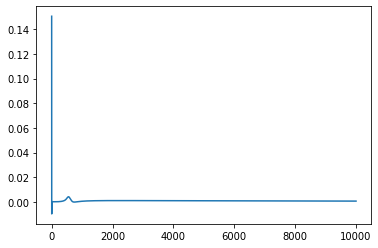

In [3]:
#define the node counts
N = 1 #number of input elements
H = 2 #number of hidden elements
M = 1 #number of output elements

#data-set stuff
# m = 1000 #number of examples
# x_train = np.random.rand(m,N)
# y_train = (x_train>0.5).astype(np.int16)

m = 1000

pos_x = 0.25 + 0.5 * np.random.rand(m//2,1)
neg_x1 = 0 + 0.25 * np.random.rand(m//4,1)
neg_x2 = 0.75 + 0.25 * np.random.rand(m//4,1)
neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.concatenate((pos_x,neg_x))
y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)



x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)






#our convension of x,y is different
x = x_train.T
y = y_train.T



#initialize the parameters as arrays with proper dimensions
W = np.random.rand(H,N)
b = np.random.rand(H)
V = np.random.rand(M,H)
c = np.random.rand(M)

cost_history = []

n_iters = 10_000
for _ in range(n_iters):
    
    #forward pass calculations
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    
    #y_hat_alpha - y_alpha
    diff = y_hat - y
    dSigmoidFactor_y_hat = y_hat * (1 - y_hat)
    
    intermediate_0 = diff * dSigmoidFactor_y_hat
    
    #fine tune c
    dE_dcALLAlpha = np.sum(intermediate_0, axis = 1)/m #dim = (M,)
    ##completely found :E_dcALLAlpha
    
    
    dE_dVALLAlphaALLBeta = np.zeros((M,H))
    for beta in range(H):
        dE_dVALLAlphaThisBeta = np.sum(intermediate_0 * h[beta,:], axis=1) /m
        dE_dVALLAlphaALLBeta[:,beta] = dE_dVALLAlphaThisBeta
    ##completely found :dE_dVALLAlphaALLBeta
    
    
    dE_dbALLAlpha = np.zeros(H)
    dE_dWALLAlpha_ALLBeta = np.zeros((H,N))
    
    for alpha in range(H):
        
        dSigmoidFactor_h_alpha = h[alpha,:] #temp
        dSigmoidFactor_h_alpha *= 1- dSigmoidFactor_h_alpha #done
        
        intermediate_1 = intermediate_0 * V[:,alpha].reshape(-1,1) * dSigmoidFactor_h_alpha
        dE_dbThisAlpha= np.sum(intermediate_1)/m
        dE_dbALLAlpha[alpha] = dE_dbThisAlpha
        
        for beta in range(N):
            dE_dWThisAlphaThisBeta= np.sum(intermediate_1 * x[beta,:])/m
            dE_dWALLAlpha_ALLBeta[alpha,beta] = dE_dWThisAlphaThisBeta
    ##completely found :dE_dbALLAlpha
    ##completely found :dE_dWALLAlpha_ALLBeta
    
    
    #All derivatives are now found
    
    #calc the cost now
    cost = np.sum(y_hat - y)/(2*m)
    cost_history.append(cost)
    
    ## Update parameters :: Gradient decesnt
    lr = 10
    
    c -= lr * dE_dcALLAlpha
    V -= lr * dE_dVALLAlphaALLBeta
    b -= lr * dE_dbALLAlpha
    W -= lr * dE_dWALLAlpha_ALLBeta

        

        
# print("Calculated weights)")
# print("c:",c)
# print("V:",V)
# print("b:",b)
# print("W:",W)
plt.plot(cost_history)
print("Final cost is:",cost_history[-1])


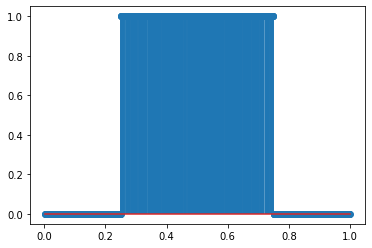

In [4]:
fig, ax = plt.subplots(1)
ax.stem(x_train,y_train)
plt.show()

In [5]:
def predict(x_test):
    x = x_test.T
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    y_predicted = y_hat.T>0.5
    return y_predicted,x,h,y_hat


In [6]:
#calc accuracy
y_pred = predict(x_train)[0]
accuracy = np.sum(y_pred == y_train)/np.prod(y_pred.shape)
print("Accuracy:", accuracy)

Accuracy: 0.998
